<a href="https://colab.research.google.com/github/Yosri15/Titanic_Classification/blob/main/Titanic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report


In [3]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Titanic_Classification/train.csv'
test_path = '/content/drive/MyDrive/Titanic_Classification/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#check the 5 first rows of the train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
# Check the structure and data types of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


In [7]:
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [11]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [12]:
train_df.groupby(['Family_Size'],as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Medium', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)


In [14]:
train_df.groupby(['Family_Size_Grouped'],as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.409091
3,Small,0.562738


In [15]:
train_df.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


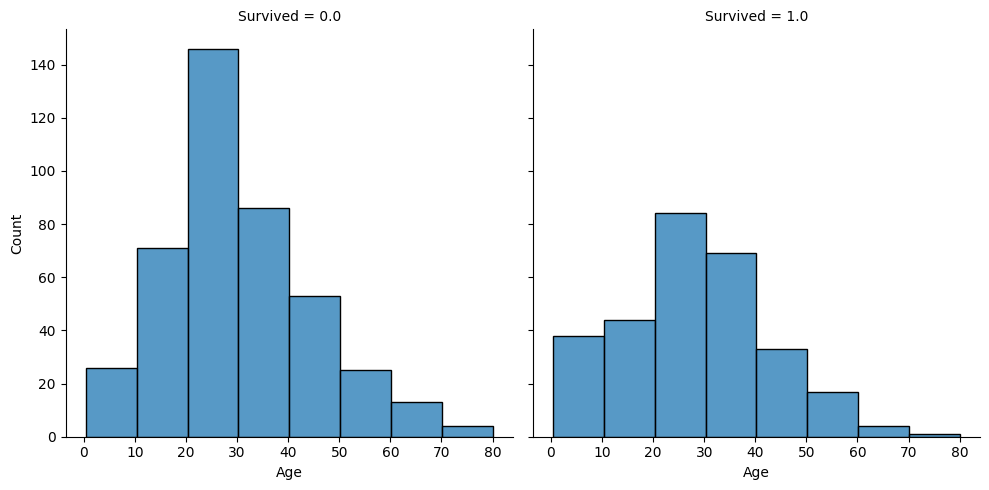

In [16]:
sns.displot(x='Age', col='Survived',data=train_df, binwidth=10 , height=5)

In [17]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [18]:
train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()

<ipython-input-18-351039488c3e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [19]:
#If a passenger's Age is less than or equal to 16--> Set their Age to 0. This groups all ages ≤ 16 into category 0
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age'] = 8

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age'] = 8


In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,...,22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,2,Small,"(20.125, 24.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,...,35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,2,Small,"(32.312, 38.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,...,26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,1,Alone,"(24.0, 28.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,...,35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,2,Small,"(32.312, 38.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,...,35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1,Alone,"(32.312, 38.0]"


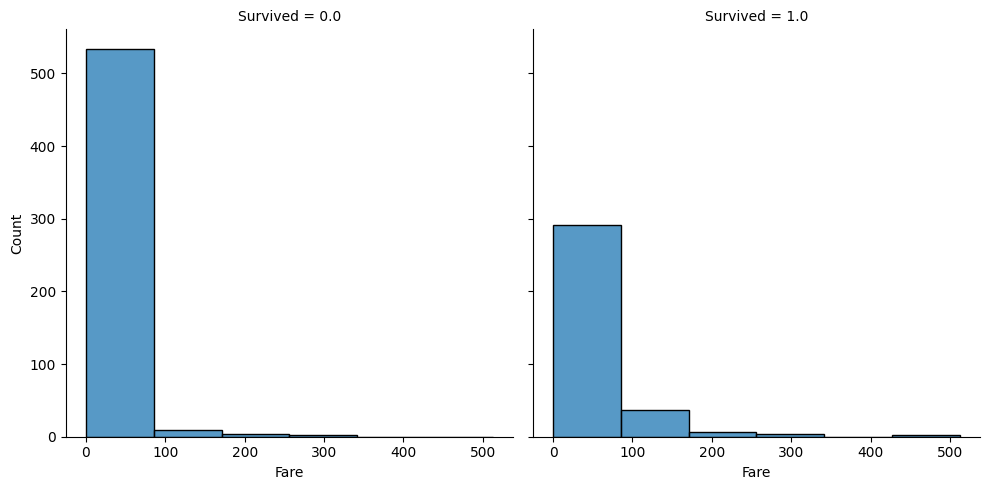

In [21]:
sns.displot(data=train_df, x='Fare', col='Survived',binwidth=80,height=5)

In [22]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [23]:
train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()

<ipython-input-23-08a1e360f460>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [24]:
#If a passenger's Fare is less than or equal to 7.775--> Set their Fare to 0. This groups all Fares ≤ 16 into category 0
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] = 6

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] = 6

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0.0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [26]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [27]:
train_df['title'] =train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x:x.strip()) #lambda is a function that removes the spaces from each name
test_df['title'] =test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x:x.strip())


In [28]:
train_df.groupby(['title'],as_index=False)['Survived'].mean()

,title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [29]:
#military Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmaried Female - Mlle, Ms, Mme

In [30]:
train_df['title'] = train_df['title'].replace({
    'Capt':'military',
    'Col':'military',
    'Major':'military',
    'Jonkheer':'noble',
    'the Countess':'noble',
    'Don':'noble',
    'Lady':'noble',
    'Sir':'noble',
    'Mlle':'unmaried Female',
    'Ms':'unmaried Female',
    'Mme':'unmaried Female',
    'Miss' : 'unmaried Female'
})

test_df['title'] = test_df['title'].replace({
    'Capt':'military',
    'Col':'military',
    'Major':'military',
    'Jonkheer':'noble',
    'the Countess':'noble',
    'Don':'noble',
    'Lady':'noble',
    'Sir':'noble',
    'Mlle':'unmaried Female',
    'Ms':'unmaried Female',
    'Mme':'unmaried Female',
    'Miss' : 'unmaried Female'
})

In [31]:
train_df.groupby(['title'],as_index=False)['Survived'].agg(['count','mean'])

,title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Mr,517,0.156673
3,Mrs,125,0.792000
4,Rev,6,0.000000
5,military,5,0.400000
6,noble,5,0.600000
7,unmaried Female,186,0.704301


In [32]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

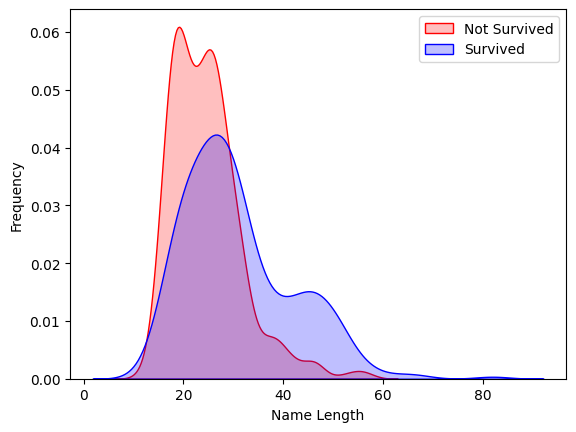

In [33]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g,color='blue', fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])